In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True) 

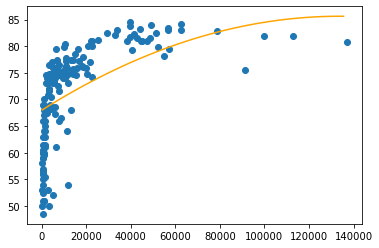

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

nations = np.genfromtxt("nations.csv", delimiter=",", skip_header=True) 


# Funktion zur Berechnung des root square error
def getRMSE (werte, erwarteteWerte):
    quadratischerFehlerSum =  np.sum(np.power((erwarteteWerte) - werte, 2))
    mse = quadratischerFehlerSum / len(werte)
    rmse = np.sqrt(mse)
    return rmse
    
# Polynomfunktion zweiten Grades mit angegebenen Koeffizienten zurückgeben
def getPolynomfunktion(x, k0, k1, k2):
    y = (k0 * pow(x, 0)) + (k1 * pow(x, 1)) + (k2 * pow(x, 2))
    return y

def normalizeMinMax(input):
    minInput = np.amin(input)
    maxInput = np.amax(input)
    normalizedMinMaxInput = (input - minInput) / (maxInput - minInput)
    return normalizedMinMaxInput
    

def denormalizeMinMax(input, minInputOriginalData, maxInputOriginalData):
    # Formel aus den Slides: 𝑑𝑒𝑛𝑜𝑟𝑚 = 𝑛𝑜𝑟𝑚 ∗ (max 𝑥 − min 𝑥 ) + min(𝑥)
    denormalizedMinMax = input * (maxInputOriginalData - minInputOriginalData) + minInputOriginalData
    return denormalizedMinMax
    
# Die tatsächlichen Werte zum Verhältnis der World Lifespan zum World GDP per Person
worldGdpPerPerson = (nations[:,3] / nations[:,6]) * 1000000
worldLifespan = nations[:,4]    

    
# original Min & Max values um später denormalisieren zu können
maxWorldGdpPerPerson = np.amax(worldGdpPerPerson)
maxWorldLifespan = np.amax(worldLifespan)
minWorldGdpPerPerson = np.amin(worldGdpPerPerson)
minWorldLifespan = np.amin(worldLifespan)

#min/max Normalization
normalizedMinMaxWorldGdpPerPerson = normalizeMinMax(worldGdpPerPerson)
normalizedMinMaxWorldLifespan = normalizeMinMax(worldLifespan)


bippp = np.expand_dims(normalizedMinMaxWorldGdpPerPerson, axis=0)
p = np.expand_dims(np.arange(0,3), axis=1)
bippp2 = np.power(bippp, p)


#Initialisierung der Variablen der kleinsten RMSE und der optimalsten Koeffizienten, smallestRMSE auf unendlich
smallestRMSE = float("inf")
besteKoeffizienten = 0

for i in range(0, 100001): 
    k0 = random.uniform(-1.0, 1.0)
    k1 = random.uniform(-1.0, 1.0)
    k2 = random.uniform(-1.0, 1.0)
    
    #Berechnung der Werte der jeweiligen Polynomfunktion
    k = np.expand_dims(np.array([k0,k1,k2]), axis=1)
    y = np.matmul(bippp2.transpose(), k)
    y = np.squeeze(y)
    
    rmse = getRMSE(y, normalizedMinMaxWorldLifespan) 
    #print(rmse)
    
    if(rmse < smallestRMSE):
        smallestRMSE = rmse
        besteKoeffizienten = np.array([k0, k1, k2])

# x Achse plotten und passend skalieren
x = np.arange(0, 1.0, 0.01)    


# Originalwerte plotten durch Denormalisierung der normalisierten Werte (checkt auch ob die beiden Funktionen funktionieren)
plt.plot(denormalizeMinMax(normalizedMinMaxWorldGdpPerPerson, minWorldGdpPerPerson, maxWorldGdpPerPerson), denormalizeMinMax(normalizedMinMaxWorldLifespan, minWorldLifespan, maxWorldLifespan), 'o')

#print(normalizedMinMaxWorldGdpPerPerson, normalizedMinMaxWorldLifespan)
#print(worldGdpPerPerson,worldLifespan)
#print(denormalizeMinMax(normalizedMinMaxWorldGdpPerPerson, minWorldGdpPerPerson, maxWorldGdpPerPerson), denormalizeMinMax(normalizedMinMaxWorldLifespan, minWorldLifespan, maxWorldLifespan))

# Polynomfunktion plotten und Werte denormalisieren
plt.plot(denormalizeMinMax(x, minWorldGdpPerPerson, maxWorldGdpPerPerson), denormalizeMinMax(getPolynomfunktion(x, besteKoeffizienten[0], besteKoeffizienten[1], besteKoeffizienten[2]), minWorldLifespan, maxWorldLifespan), color="orange")
#print(smallestRMSE)

#print(normalizedMinMaxWorldGdpPerPerson, normalizedMinMaxWorldLifespan)
#print(besteKoeffizienten)
plt.show()